In [3]:
import pickle
uncertainty_dict = pickle.load(open('/home/yzy/fmri/history/decoding0907/embedding/content2log.pkl','rb'))

In [4]:
import math
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

tokenizer = AutoTokenizer.from_pretrained('/home/yzy/.cache/huggingface/hub/models--gpt2-xl/snapshots/33cdb5c0db5423c1879b1b9f16c352988e8754a8')
def f(x):
    return math.log(x+1)

def series2values(x):
    for i in range(1, len(x)):
        x[i] *= x[i - 1]
    return x

def get_prob(x, cut = 1):
    return f(series2values(x[:cut])[-1])

def see_sample(item_list,):
    for idx, item in enumerate(item_list):
        item[1] = series2values(item[1])
        item[1] = [f(x) for x in item[1]]
        plt.plot([i for i in range(len(item[1]))], item[1], label = idx)
    
    plt.legend()    
    plt.show()
    

In [9]:
%reload_ext autoreload
%autoreload 2
from jupyter_utils import get_iterate_results
result_1 = get_iterate_results(base_path = '../../history/decoding0907/results/', para_str = 'gpt2-xl_lr1e-5_tid1,2', dataset_name='Pereira', print_log=True,bert_metric=None)
result_2 = get_iterate_results(base_path = '../../history/decoding0907/results/', para_str = 'gpt2-xl_lr1e-5_tid1,2_random', dataset_name='Pereira', print_log=True,bert_metric=None)






P01:	corpus_bleu_score_1: 0.208 rouge_1: 0.206 rouge_l: 0.195 loss: 2.801
M02:	corpus_bleu_score_1: 0.206 rouge_1: 0.201 rouge_l: 0.193 loss: 2.906
M04:	corpus_bleu_score_1: 0.187 rouge_1: 0.177 rouge_l: 0.171 loss: 2.899
M07:	corpus_bleu_score_1: 0.197 rouge_1: 0.184 rouge_l: 0.178 loss: 2.888
M15:	corpus_bleu_score_1: 0.195 rouge_1: 0.189 rouge_l: 0.181 loss: 2.855
corpus_bleu_score_1: 0.19847238095238096 rouge_1: 0.19133333333333336 rouge_l: 0.18341333333333334 valid_loss: 2.86970452337265
P01:	corpus_bleu_score_1: 0.179 rouge_1: 0.163 rouge_l: 0.157 loss: 3.201
M02:	corpus_bleu_score_1: 0.179 rouge_1: 0.163 rouge_l: 0.157 loss: 3.201
M04:	corpus_bleu_score_1: 0.179 rouge_1: 0.163 rouge_l: 0.157 loss: 3.201
M07:	corpus_bleu_score_1: 0.179 rouge_1: 0.163 rouge_l: 0.157 loss: 3.201
M15:	corpus_bleu_score_1: 0.179 rouge_1: 0.163 rouge_l: 0.157 loss: 3.201
corpus_bleu_score_1: 0.17871428571428571 rouge_1: 0.16266666666666668 rouge_l: 0.15673333333333334 valid_loss: 3.201036391019821


In [ ]:
def find_first_nonmatching_index(arr1, arr2):
    for i in range(min(len(arr1), len(arr2))):
        if arr1[i] != arr2[i]:
            return i
    return min(len(arr1), len(arr2))

def get_first_token(content_true, content_pred_list):
    content_true = tokenizer.encode(content_true)
    min_tokens = 1e6
    for content_pred in content_pred_list:
        content_pred = tokenizer.encode(content_pred)
        first_token = find_first_nonmatching_index(content_true, content_pred)
        if min_tokens > first_token:
            min_tokens = first_token
    return min_tokens
    

In [ ]:
x_dict_1 = {'true_score': [], 'result':[],'bleu':[]}
x_dict_2 = {'true_score': [], 'result':[],'bleu':[]}

# if true score is very low, it indicates it is a very hard case for lms
for i in range(len(result_1['content_pred'])):
    first_token = get_first_token(result_2['content_true'][i], [result_1['content_pred_old'][i], result_2['content_pred_old'][i]])
    prob_list = uncertainty_dict[result_1['content_prev'][i]][result_1['content_pred_old'][i]]['prob_list']
    x_dict_1['result'].append(f(prob_list[first_token]))
    prob_list = uncertainty_dict[result_2['content_prev'][i]][result_2['content_pred_old'][i]]['prob_list']
    x_dict_2['result'].append(f(prob_list[first_token]))
    prob_list = uncertainty_dict[result_2['content_prev'][i]][result_2['content_true'][i]]['prob_list']
    x_dict_1['true_score'].append(f(prob_list[first_token]))
    x_dict_2['true_score'].append(f(prob_list[first_token]))
    
    x_dict_1['bleu'].append(result_1['corpus_bleu_score'][1][i])
    x_dict_2['bleu'].append(result_2['corpus_bleu_score'][1][i])

0.6107211 0.4993353


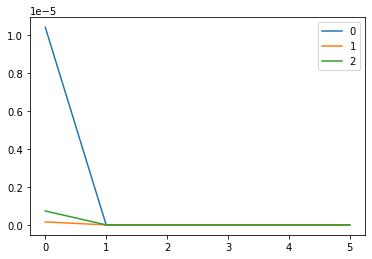

0.44889355 0.516804


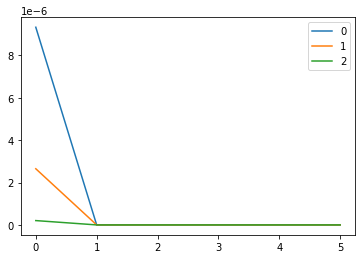

0.5168222 0.4650556


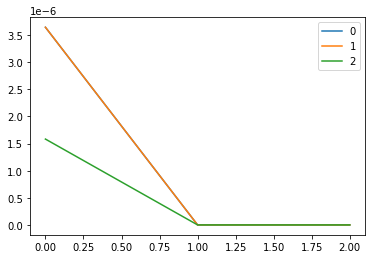

0.41377062 0.67619604


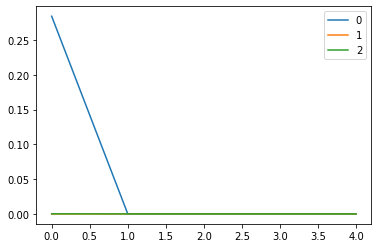

0.60026884 0.5934006


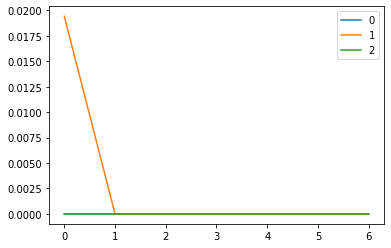

0.5998398 0.5897665


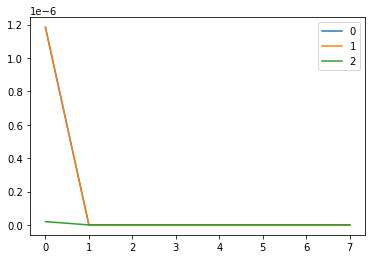

0.54127616 0.57473266


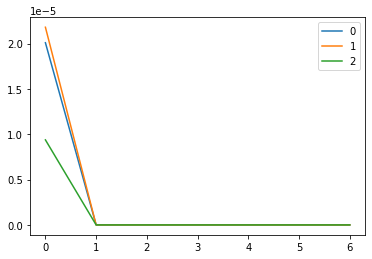

0.73644125 0.80019975


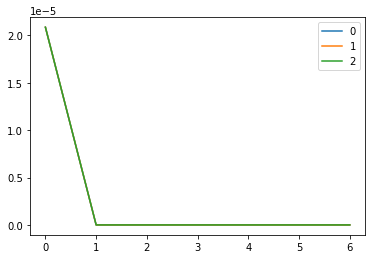

0.5935166 0.7110113


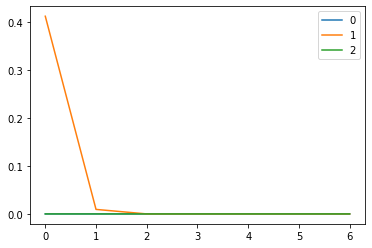

0.5744473 0.60595125


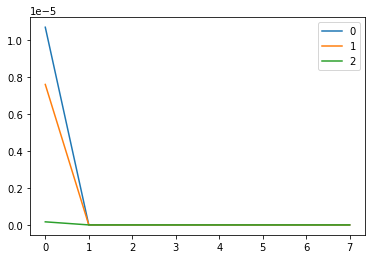

0.6692735 0.6163203


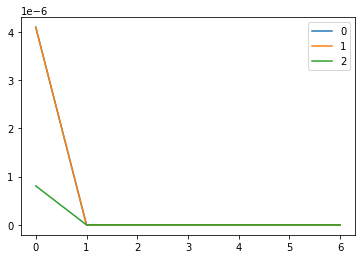

0.7022937 0.6322646


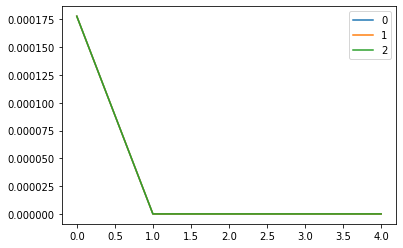

In [64]:
# %reload_ext autoreload
# %autoreload 2
# from jupyter_utils import get_iterate_results
# result_1 = get_iterate_results(base_path = '../results/', para_str = 'gpt2-xl_lr1e-5_tid1,2', dataset_name='Pereira', print_log=True,)
# result_2 = get_iterate_results(base_path = '../results/', para_str = 'gpt2-xl_lr1e-5_tid1,2_random', dataset_name='Pereira', print_log=True)

for i in range(len(result_1['content_pred'])):
    prob_list = uncertainty_dict[result_1['content_prev'][i]][result_1['content_pred_old'][i]]['prob_list']
    item1 = [result_1['content_pred'], prob_list]
    prob_list = uncertainty_dict[result_2['content_prev'][i]][result_2['content_pred_old'][i]]['prob_list']
    item2 = [result_2['content_pred'], prob_list]
    prob_list = uncertainty_dict[result_2['content_prev'][i]][result_2['content_true'][i]]['prob_list']
    item3 = [result_2['content_true'], prob_list]
    print(result_1['bert_scores'][i], result_2['bert_scores'][i])
    see_sample([item1,item2,item3])
    if i > 10:
        break





In [81]:


# if true score is very low, it indicates it is a very hard case for lms
re = {'>':0,'<':0,'=':0}
z_count = 0
for i in range(len(result_1['content_pred'])):
    first_token_1 = get_first_token(result_2['content_true'][i], [result_1['content_pred_old'][i]])
    first_token_2 = get_first_token(result_2['content_true'][i], [result_2['content_pred_old'][i]])
    fenbu.append(first_token_1)
    if first_token_1 > first_token_2:
        re['>'] += 1
    elif first_token_1 == first_token_2:
        re['='] += 1
        if first_token_1 == 0:
            z_count += 1
    elif first_token_1 < first_token_2:
        re['<'] += 1
re



{'>': 121, '<': 63, '=': 1066}

In [82]:
z_count

914

In [6]:
x_dict_1 = {'true_score': [], 'result':[],'bleu':[]}
x_dict_2 = {'true_score': [], 'result':[],'bleu':[]}

# if true score is very low, it indicates it is a very hard case for lms
for i in range(len(result_1['content_pred'])):
    first_token = get_first_token(result_2['content_true'][i], [result_1['content_pred_old'][i], result_2['content_pred_old'][i]])
    prob_list = uncertainty_dict[result_1['content_prev'][i]][result_1['content_pred_old'][i]]['prob_list']
    x_dict_1['result'].append(f(prob_list[first_token]))
    prob_list = uncertainty_dict[result_2['content_prev'][i]][result_2['content_pred_old'][i]]['prob_list']
    x_dict_2['result'].append(f(prob_list[first_token]))
    prob_list = uncertainty_dict[result_2['content_prev'][i]][result_2['content_true'][i]]['prob_list']
    x_dict_1['true_score'].append(f(prob_list[first_token]))
    x_dict_2['true_score'].append(f(prob_list[first_token]))
    
    x_dict_1['bleu'].append(result_1['corpus_bleu_score'][1][i])
    x_dict_2['bleu'].append(result_2['corpus_bleu_score'][1][i])
    

plt.scatter(x_dict_1['true_score'], x_dict_1['bleu'], label='result_1')
plt.scatter(x_dict_2['true_score'], x_dict_2['bleu'], label='result_2')
plt.legend()
plt.show()


NameError: name 'result_1' is not defined

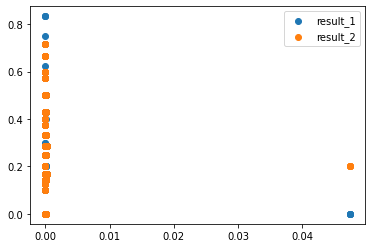

In [103]:
x_dict_1 = {'true_score': [], 'result':[],'bleu':[]}
x_dict_2 = {'true_score': [], 'result':[],'bleu':[]}

# if true score is very low, it indicates it is a very hard case for lms
for i in range(len(result_1['content_pred'])):
    first_token = 0
    prob_list = uncertainty_dict[result_1['content_prev'][i]][result_1['content_pred_old'][i]]['prob_list']
    x_dict_1['result'].append(f(prob_list[first_token]))
    prob_list = uncertainty_dict[result_2['content_prev'][i]][result_2['content_pred_old'][i]]['prob_list']
    x_dict_2['result'].append(f(prob_list[first_token]))
    prob_list = uncertainty_dict[result_2['content_prev'][i]][result_2['content_true'][i]]['prob_list']
    x_dict_1['true_score'].append(f(prob_list[first_token]))
    x_dict_2['true_score'].append(f(prob_list[first_token]))
    
    x_dict_1['bleu'].append(result_1['corpus_bleu_score'][1][i])
    x_dict_2['bleu'].append(result_2['corpus_bleu_score'][1][i])
    

plt.scatter(x_dict_1['true_score'], x_dict_1['bleu'], label='result_1')
plt.scatter(x_dict_2['true_score'], x_dict_2['bleu'], label='result_2')
plt.legend()
plt.show()


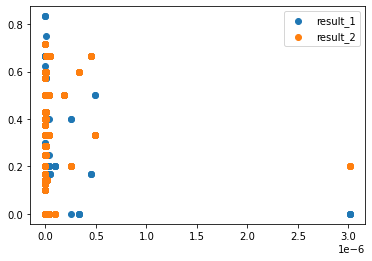

In [105]:
x_dict_1 = {'true_score': [], 'result':[],'bleu':[]}
x_dict_2 = {'true_score': [], 'result':[],'bleu':[]}

for i in range(len(result_1['content_pred'])):
    total_prob = uncertainty_dict[result_1['content_prev'][i]][result_1['content_pred_old'][i]]['total_prob']
    x_dict_1['result'].append(total_prob)
    total_prob = uncertainty_dict[result_2['content_prev'][i]][result_2['content_pred_old'][i]]['total_prob']
    x_dict_2['result'].append(total_prob)
    total_prob = uncertainty_dict[result_2['content_prev'][i]][result_2['content_true'][i]]['total_prob']
    x_dict_1['true_score'].append(total_prob)
    x_dict_2['true_score'].append(total_prob)
    
    x_dict_1['bleu'].append(result_1['corpus_bleu_score'][1][i])
    x_dict_2['bleu'].append(result_2['corpus_bleu_score'][1][i])
    

plt.scatter(x_dict_1['true_score'], x_dict_1['bleu'], label='result_1')
plt.scatter(x_dict_2['true_score'], x_dict_2['bleu'], label='result_2')
plt.legend()
plt.show()


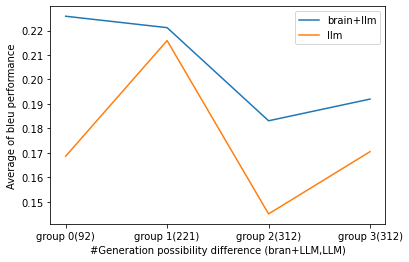

In [115]:
arrs = []
for i in range(len(x_dict_1['result'])):
    arrs.append(f(x_dict_1['result'][i])-f(x_dict_2['result'][i]))

paint(arrs, x_dict_1['bleu'], x_dict_2['bleu'])

In [109]:
arrs[:10]

[4.531579608797082e-08,
 3.718044975800316e-09,
 0.0,
 0.0015467921054447564,
 4.62518912058689e-13,
 1.4158134654377282e-09,
 -3.3378690854461243e-09,
 6.861468612209164e-08,
 -4.860800639055494e-09,
 -3.6379788070850955e-12]

In [110]:
x_dict_1['result'][6]

3.6489120924973895e-10

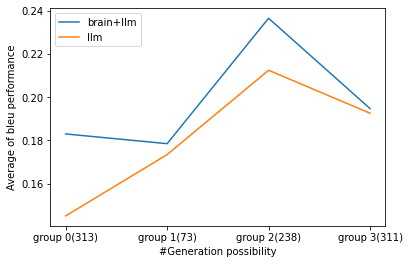

In [112]:
arrs = []
for i in range(len(x_dict_1['result'])):
    arrs.append(f(x_dict_2['result'][i])-f(x_dict_1['result'][i]))

paint(arrs, x_dict_1['bleu'], x_dict_2['bleu'])

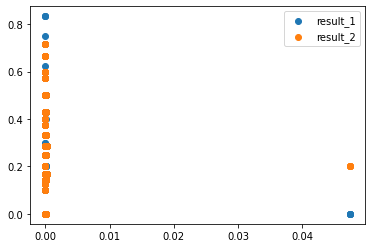

In [65]:
x_dict_1 = {'true_score': [], 'result':[],'bleu':[]}
x_dict_2 = {'true_score': [], 'result':[],'bleu':[]}

# if true score is very low, it indicates it is a very hard case for lms
for i in range(len(result_1['content_pred'])):
    prob_list = uncertainty_dict[result_1['content_prev'][i]][result_1['content_pred_old'][i]]['prob_list']
    x_dict_1['result'].append(get_prob(prob_list))
    prob_list = uncertainty_dict[result_2['content_prev'][i]][result_2['content_pred_old'][i]]['prob_list']
    x_dict_2['result'].append(get_prob(prob_list))
    prob_list = uncertainty_dict[result_2['content_prev'][i]][result_2['content_true'][i]]['prob_list']
    x_dict_1['true_score'].append(get_prob(prob_list))
    x_dict_2['true_score'].append(get_prob(prob_list))
    
    x_dict_1['bleu'].append(result_1['corpus_bleu_score'][1][i])
    x_dict_2['bleu'].append(result_2['corpus_bleu_score'][1][i])
    

plt.scatter(x_dict_1['true_score'], x_dict_1['bleu'], label='result_1')
plt.scatter(x_dict_2['true_score'], x_dict_2['bleu'], label='result_2')
plt.legend()
plt.show()


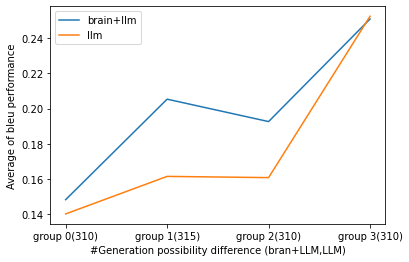

In [114]:
import numpy as np
def paint(x,y1,y2):
    x = np.array(x)
    y1 = np.array(y1)
    y2 = np.array(y2)

    num_bins = 4
    sorted_x = sorted(x)  # 对数据进行排序，得到索引
    group_size = len(x) // num_bins  # 每个分组的数据数量
    remainder = len(x) % num_bins  # 余数，用于平衡每组的数据数量
    bin_sizes = [group_size + 1 if i < remainder else group_size for i in range(num_bins)]  # 每个分组的数据数量列表
    bin_edges = np.array(sorted_x)[[np.sum(bin_sizes[:i+1]) - 1 for i in range(num_bins)]]
    bin_edges = np.insert(bin_edges,0,0)
    bin_edges = np.unique(bin_edges)
    num_bins = len(bin_edges) - 1  
    # 计算每个分组内y数据的平均值
    bin_y1_avg = [np.mean(y1[(x >= bin_edges[i]) & (x < bin_edges[i + 1])]) for i in range(num_bins)]
    bin_y2_avg = [np.mean(y2[(x >= bin_edges[i]) & (x < bin_edges[i + 1])]) for i in range(num_bins)]
    plt.xticks(range(num_bins), [f'group {i}({len(y1[(x >= bin_edges[i]) & (x < bin_edges[i + 1])])})' for i in range(num_bins)])
    plt.plot(range(0, num_bins), bin_y1_avg, label='brain+llm')
    plt.plot(range(0, num_bins), bin_y2_avg, label='llm')
    plt.xlabel('#Generation possibility difference (bran+LLM,LLM)')
    plt.ylabel(f'Average of bleu performance')
    plt.legend()
    plt.show()
paint(x_dict_1['true_score'], x_dict_1['bleu'], x_dict_2['bleu'])

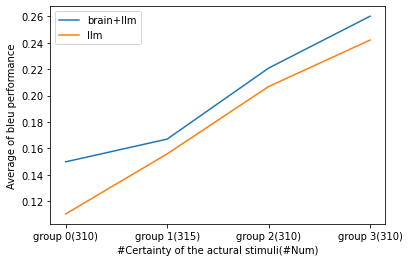

In [104]:
paint(x_dict_2['true_score'], x_dict_1['bleu'], x_dict_2['bleu'])


NameError: name 'x_dict_2' is not defined

In [53]:
bin_edges

array([0.00000000e+00, 2.01041446e-14, 1.40614240e-12, 2.25806064e-11,
       3.22238651e-10, 3.01211986e-06])